# Exploratory Data Analysis of Retail Store

By: John Klenn Andrew P. Dungaran \
Date: April 2024

## Introduction

Task #3 from The Sparks Foundation - Graduate Rotational Internship Program, conducted in April 2024, involved Exploratory Data Analysis of a retail store based in the US.

### Step 5: Asking Question
* Formulate questions about the dataset
* Answer the questions

## Step 0: Imports and Reading Data

Importing all the necessary tools that will be needed in the analysis.

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [133]:
# Read the Dataset
df_store = pd.read_csv('SampleSuperstore.csv')

## Step 1: Understanding the Data

What does this dataset contains?
* Dataframe `shape`
* `head` and `tail`
* `dtypes` or `info`
* `describe`

In [134]:
# Inspecting what the dataset contains
df_store.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [135]:
# Determining the number of rows and columns
dfshape = df_store.shape
print(f'Number of Rows: {dfshape[0]}')
print(f'Number of Columns: {dfshape[1]}')

Number of Rows: 9994
Number of Columns: 13


In [136]:
# Determining the datatypes of each column
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [137]:
# Getting the statistical overview of the dataset
df_store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Step 2: Data Preperation

Clean the data!
* Dropping irrelevant columns and/or rows
* Identifying duplicates
* Renaming
* Feature creation

In [138]:
# Number of duplicates
df_store.duplicated().value_counts()

False    9977
True       17
Name: count, dtype: int64

We found out that there are `17` duplicates in the dataset.

Since there are no unique identifiers (such as codes or shipment dates) to distinguish between duplicate values, we will need to seek insights from other departments to further investigate these duplicates. 

However, for the purposes of our current analysis, we will proceed by removing these duplicate values from the dataset.

In [139]:
df_store = df_store.loc[~df_store.duplicated()].copy()
df_store

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


## Step 3: Feature Relationship

* Numerical and/or Categorical Analysis
* Plotting feature distributions
    * Histogram
    * Boxplot
    * Pie Chart
    * Barplot
    * Scatterplot
    * Heatmap Correlation
    * Pairplot

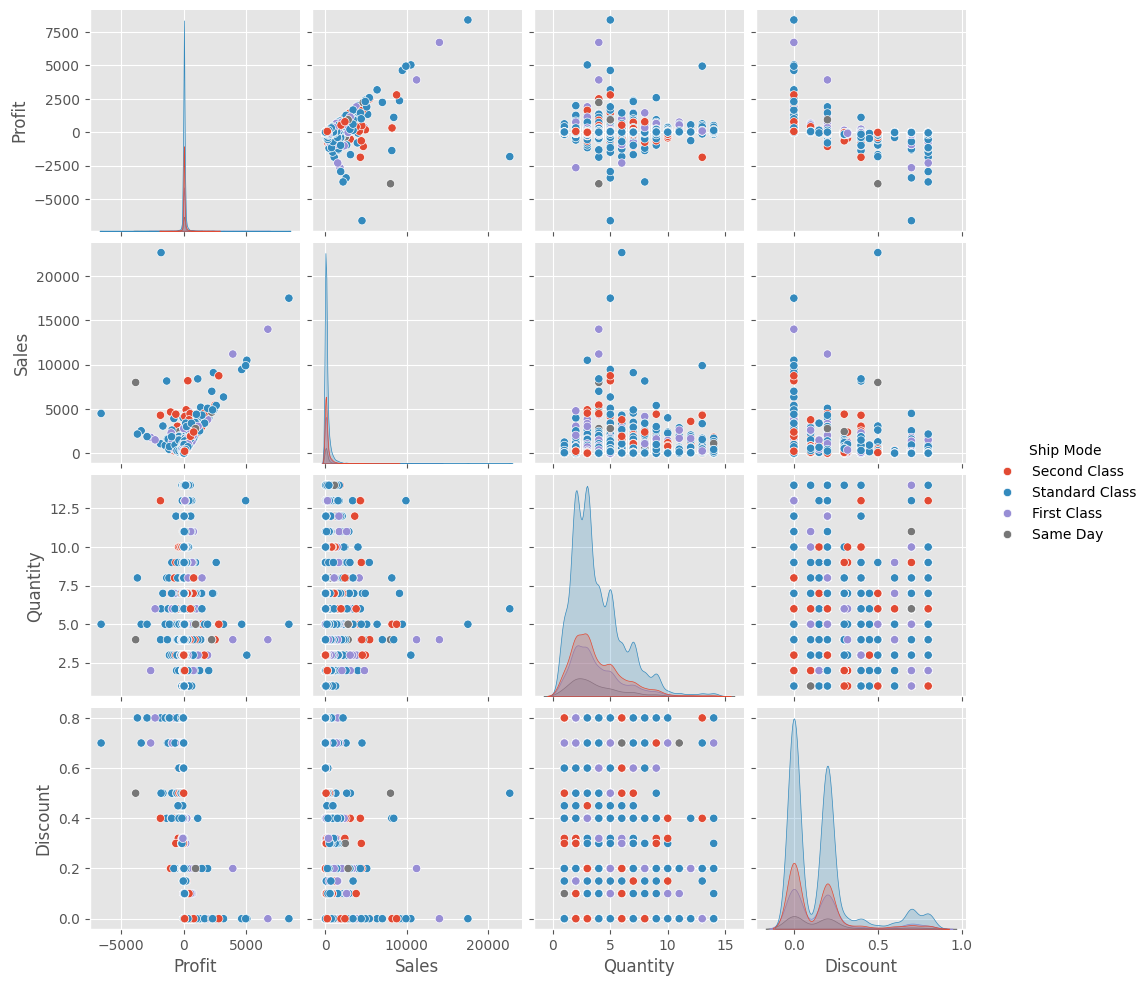

In [141]:
# PairPlot to get an overall view of what we're dealing with
sns.pairplot(df_store, vars=['Profit', 'Sales', 'Quantity', 'Discount'], hue='Ship Mode')
plt.show()

### Numerical Analysis (Turn all histogram into kerner density plots)

* Exploratory Analysis for those with `numeric` data types.

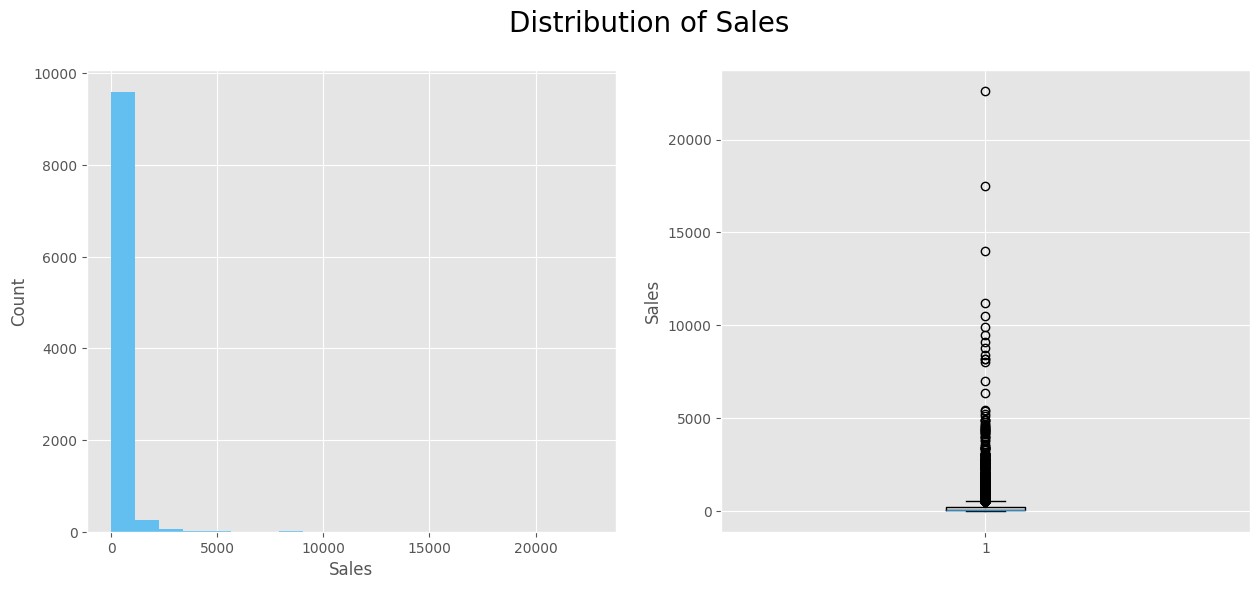

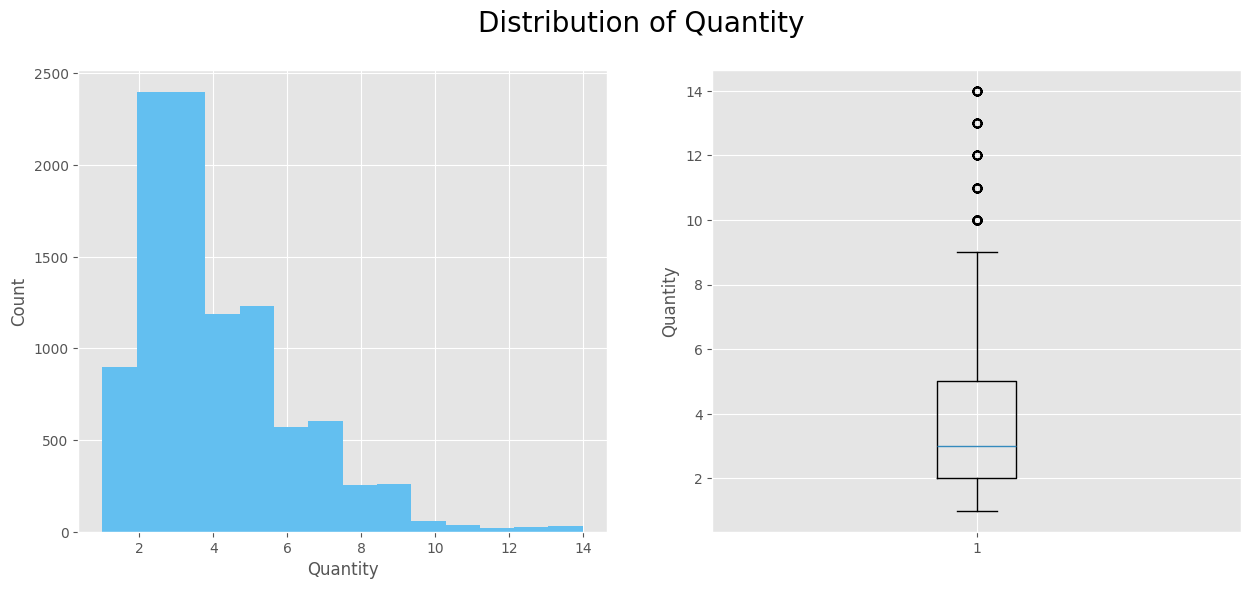

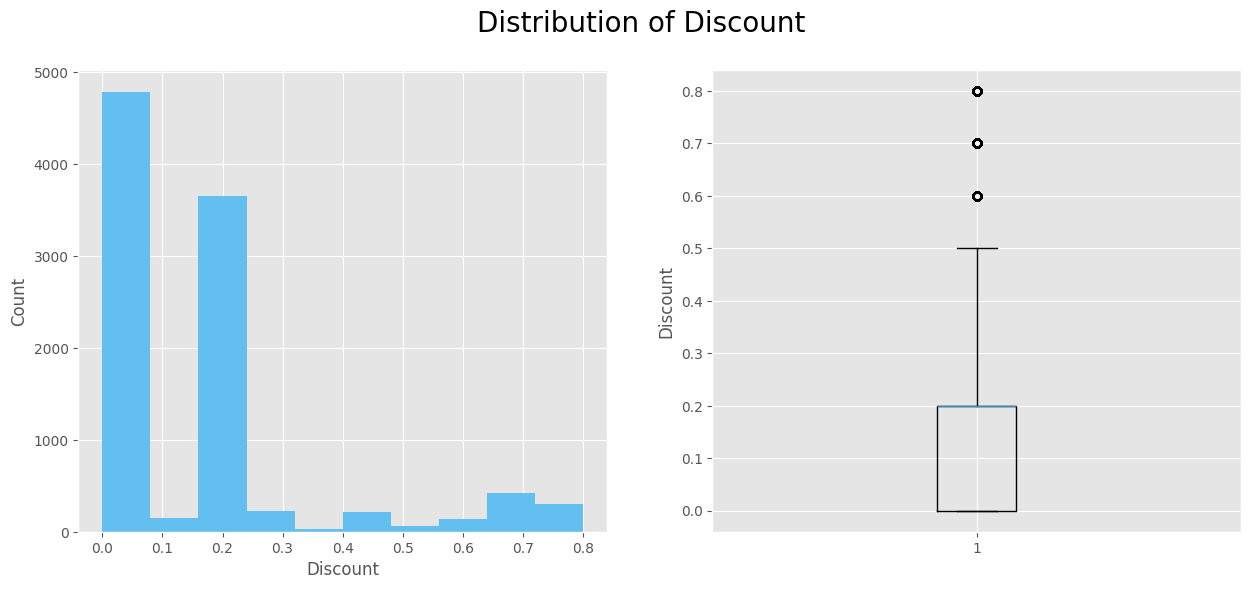

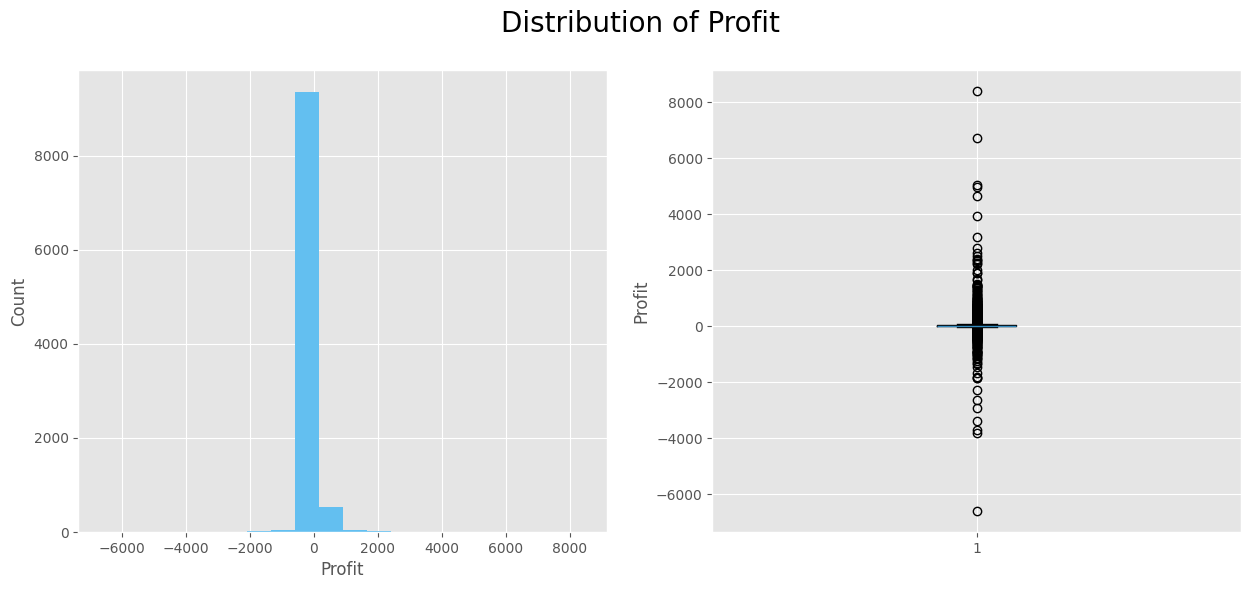

In [ ]:
# Distribution of Sales
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.hist(df_store['Sales'], bins=20, color='#63bff0')
ax1.set_ylabel('Count')
ax1.set_xlabel('Sales')

ax2.boxplot(df_store['Sales'])
ax2.set_ylabel('Sales')

plt.suptitle('Distribution of Sales', fontsize=20)

# Distribution of Quantity
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.hist(df_store['Quantity'], bins=14, color='#63bff0')
ax1.set_ylabel('Count')
ax1.set_xlabel('Quantity')

ax2.boxplot(df_store['Quantity'])
ax2.set_ylabel('Quantity')

plt.suptitle('Distribution of Quantity', fontsize=20)

# Distribution of Discount
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.hist(df_store['Discount'], bins=10, color='#63bff0')
ax1.set_ylabel('Count')
ax1.set_xlabel('Discount')

ax2.boxplot(df_store['Discount'])
ax2.set_ylabel('Discount')

plt.suptitle('Distribution of Discount', fontsize=20)

#Distribution of Profit
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

ax1.hist(df_store['Profit'], bins=20, color='#63bff0')
ax1.set_ylabel('Count')
ax1.set_xlabel('Profit')

ax2.boxplot(df_store['Profit'])
ax2.set_ylabel('Profit')

plt.suptitle('Distribution of Profit', fontsize=20)

plt.show()

#### Correlation

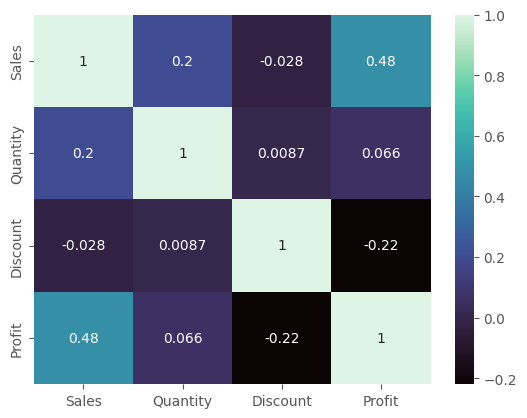

In [ ]:
sns.heatmap(df_store[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), annot=True, cmap=sns.color_palette('mako', as_cmap=True))
plt.show()

#### Key Takeaway

* The **Profit** and **Sales** have a **POSITIVE** correlation. `R = 0.48`
* The **Sales** and **Quantity** have a **POSITIVE** correlation. `R = 0.2`
* The **Profit** and **Discount** have a **NEGATIVE** correlation. `R = -0.22`
* Everything else either have very weak correlation or no correlation with each other. `R ≈ 0`

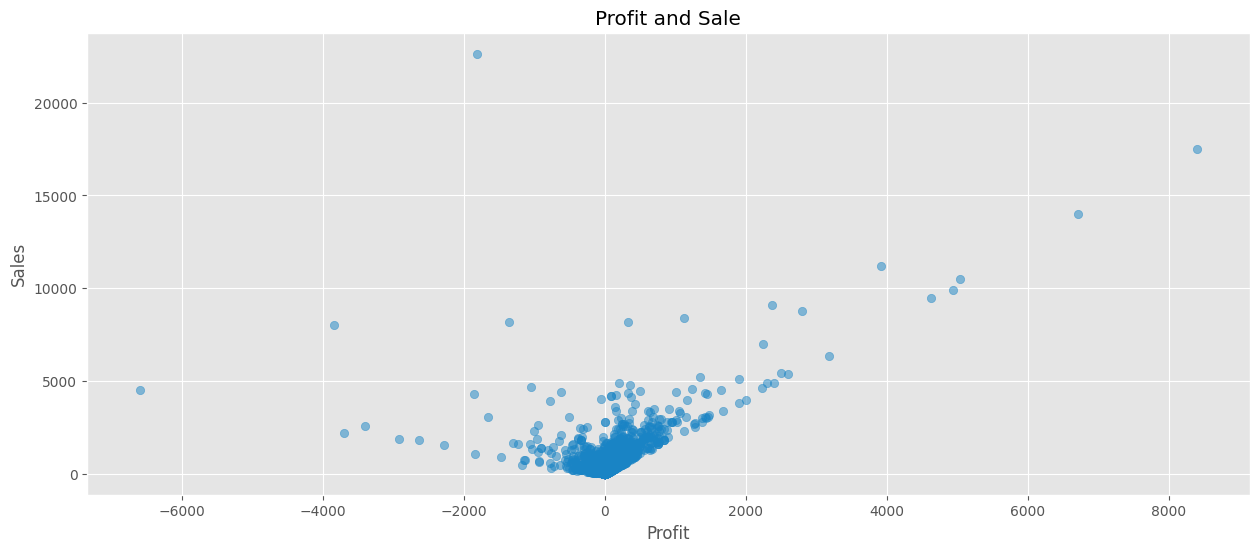

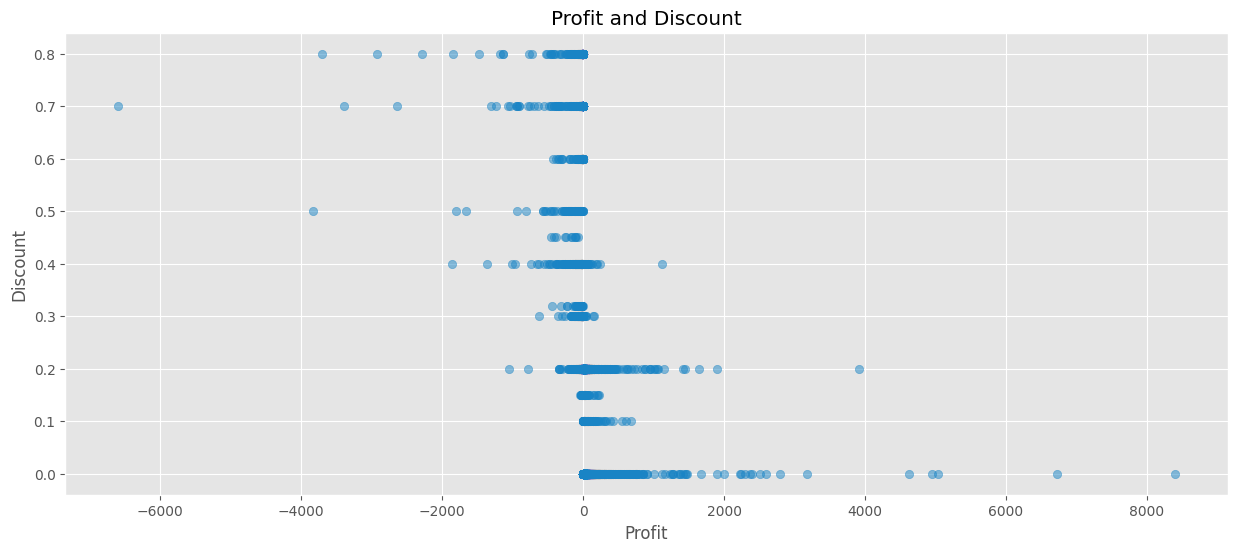

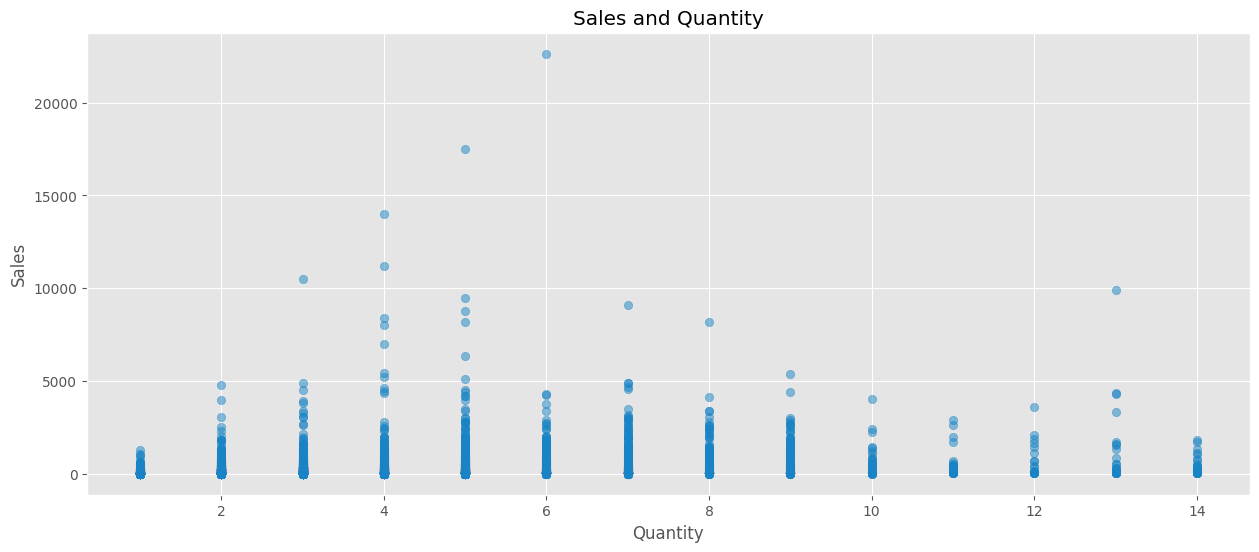

In [ ]:
# Scatter plot Profit and Sales
plt.figure(figsize=(15,6))
plt.scatter(df_store['Profit'], df_store['Sales'], color='#1984c5', alpha=0.5)
plt.ylabel('Sales')
plt.xlabel('Profit')
plt.title('Profit and Sale')

# Scatter plot Profit and Discount
plt.figure(figsize=(15,6))
plt.scatter(df_store['Profit'], df_store['Discount'], color='#1984c5', alpha=0.5)
plt.ylabel('Discount')
plt.xlabel('Profit')
plt.title('Profit and Discount')

# Scatter plot Sales and Quantity
plt.figure(figsize=(15,6))
plt.scatter(df_store['Quantity'], df_store['Sales'], color='#1984c5', alpha=0.5)
plt.ylabel('Sales')
plt.xlabel('Quantity')
plt.title('Sales and Quantity')

plt.show()

### Categorical Analysis

* Exploratory analysis for those with `object` data types.

#### Ship Mode

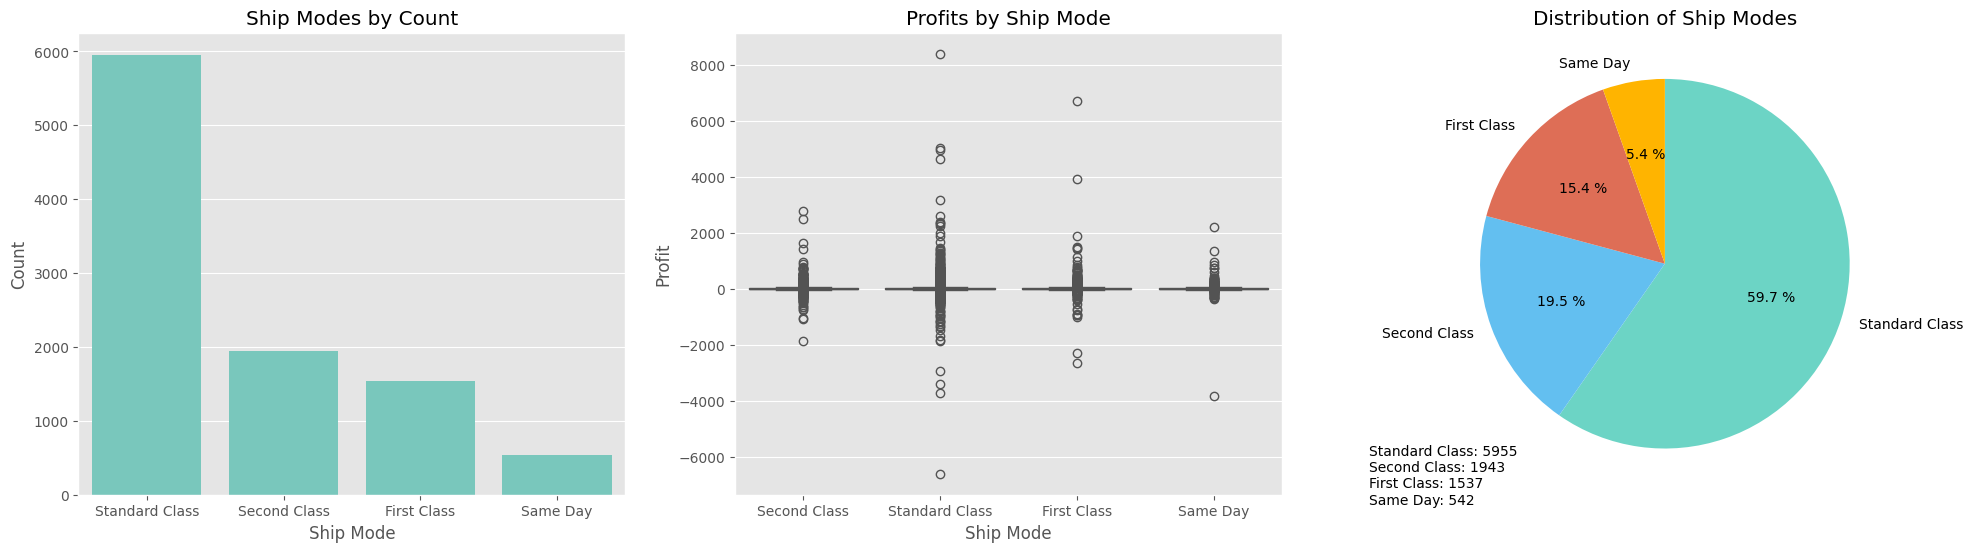

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
sm_count = df_store['Ship_Mode'].value_counts()

# Barplot
ax1 = sns.barplot(sm_count, ax=ax1,  color='#6cd4c5')
ax1.set_title('Ship Modes by Count')
ax1.set_ylabel('Count')
ax1.set_xlabel('Ship Mode')

# Boxplot
ax2 = sns.boxplot(y=df_store['Profit'], x=df_store['Ship_Mode'], ax=ax2)
ax2.set_title('Profits by Ship Mode')
ax2.set_xlabel('Ship Mode')

# Piechart
sm_colors = ['#6cd4c5', '#63bff0', '#de6e56', '#ffb400']
sm_labels = ['Standard Class', 'Second Class', 'First Class', 'Same Day']
plt.pie(sm_count, colors=sm_colors, labels=sm_labels, autopct='%.1f %%', startangle=90, counterclock=False)
plt.title('Distribution of Ship Modes')
plt.text(-1.6, -1.3, f'Standard Class: {sm_count.iloc[0]}\nSecond Class: {sm_count.iloc[1]}\nFirst Class: {sm_count.iloc[2]}\nSame Day: {sm_count.iloc[3]}', horizontalalignment='left')

plt.show()

#### Segment

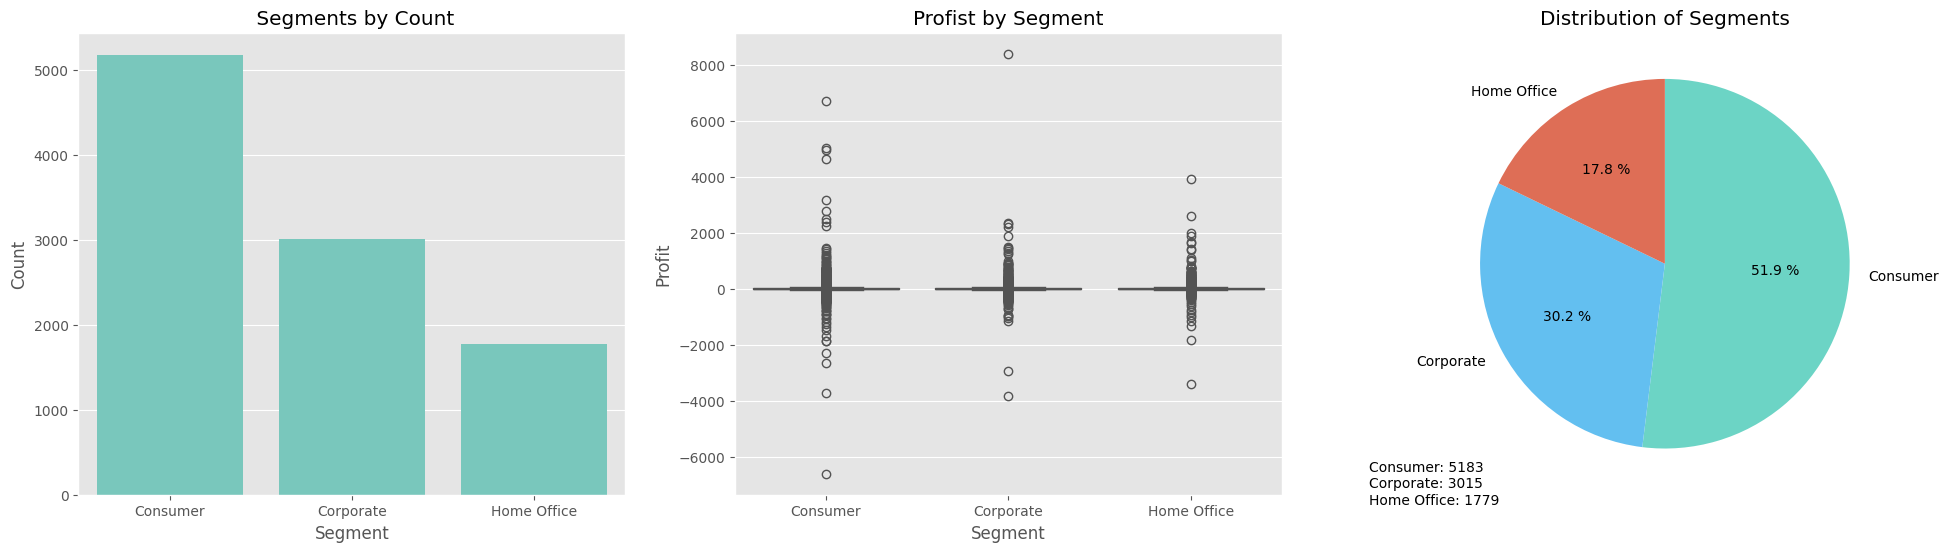

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
s_count = df_store['Segment'].value_counts()

# Barplot
ax1 = sns.barplot(s_count, ax=ax1,  color='#6cd4c5')
ax1.set_title(' Segments by Count')
ax1.set_ylabel('Count')
ax1.set_xlabel('Segment')

# Boxplot
ax2 = sns.boxplot(y=df_store['Profit'], x=df_store['Segment'], ax=ax2)
ax2.set_title('Profist by Segment')
ax2.set_xlabel('Segment')

# Piechart
s_colors = ['#6cd4c5', '#63bff0', '#de6e56']
s_labels = ['Consumer', 'Corporate', 'Home Office']
plt.pie(s_count, colors=s_colors, labels=s_labels, autopct='%.1f %%', startangle=90, counterclock=False)
plt.title('Distribution of Segments')
plt.text(-1.6, -1.3, f'Consumer: {s_count.iloc[0]}\nCorporate: {s_count.iloc[1]}\nHome Office: {s_count.iloc[2]}', horizontalalignment='left')

plt.show()

#### Region

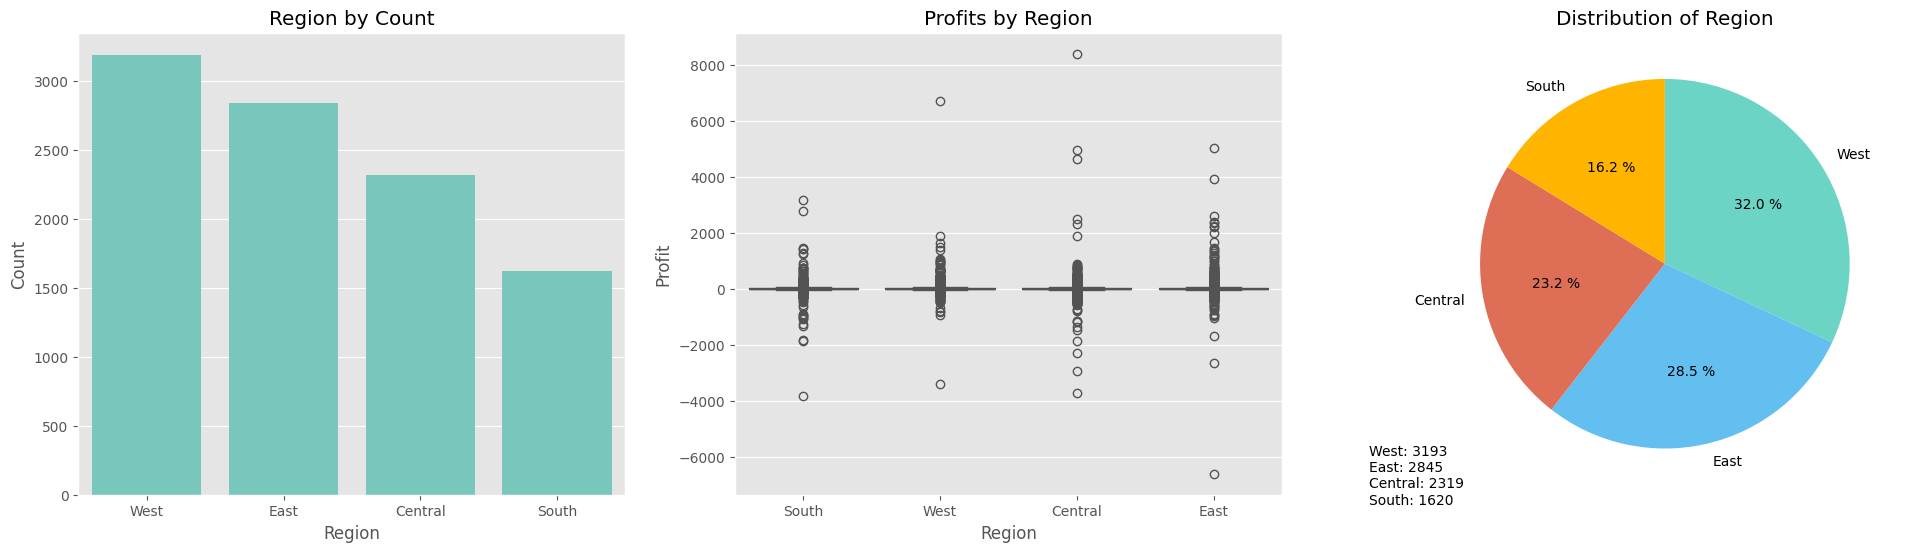

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
r_count = df_store['Region'].value_counts()

# Barplot
ax1 = sns.barplot(r_count, ax=ax1,  color='#6cd4c5')
ax1.set_title('Region by Count')
ax1.set_ylabel('Count')
ax1.set_xlabel('Region')

# Boxplot
ax2 = sns.boxplot(y=df_store['Profit'], x=df_store['Region'], ax=ax2)
ax2.set_title('Profits by Region')
ax2.set_xlabel('Region')

# Piechart
r_colors = ['#6cd4c5', '#63bff0', '#de6e56', '#ffb400']
r_labels = ['West', 'East', 'Central', 'South']
plt.pie(r_count, colors=r_colors, labels=r_labels, autopct='%.1f %%', startangle=90, counterclock=False)
plt.title('Distribution of Region')
plt.text(-1.6, -1.3, f'West: {r_count.iloc[0]}\nEast: {r_count.iloc[1]}\nCentral: {r_count.iloc[2]}\nSouth: {r_count.iloc[3]}', horizontalalignment='left')

plt.show()

#### State

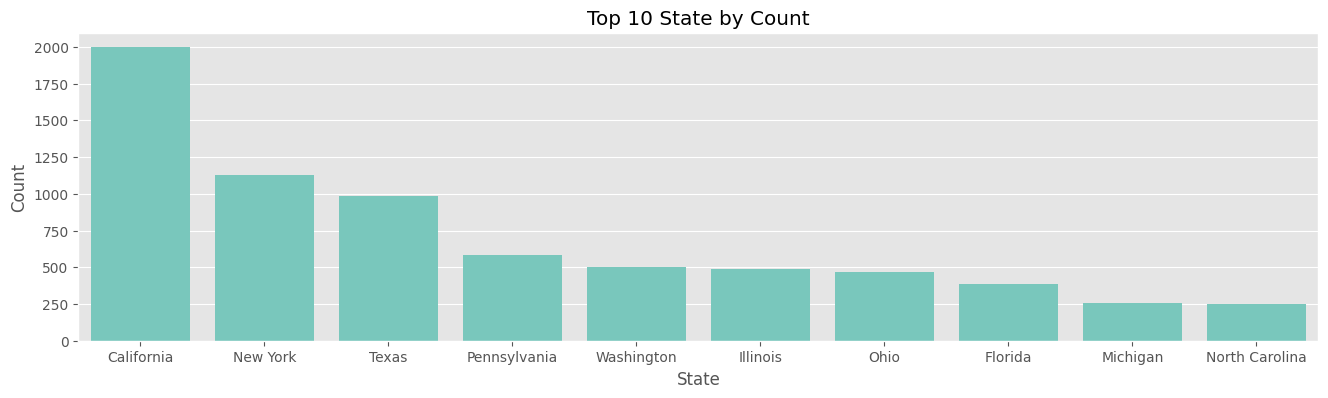

In [ ]:
plt.figure(figsize=(16,4))
st_count = df_store['State'].value_counts().nlargest(10)

ax = sns.barplot(st_count, color='#6cd4c5')
ax.set_ylabel('Count')
ax.set_title('Top 10 State by Count')

plt.show()

#### City

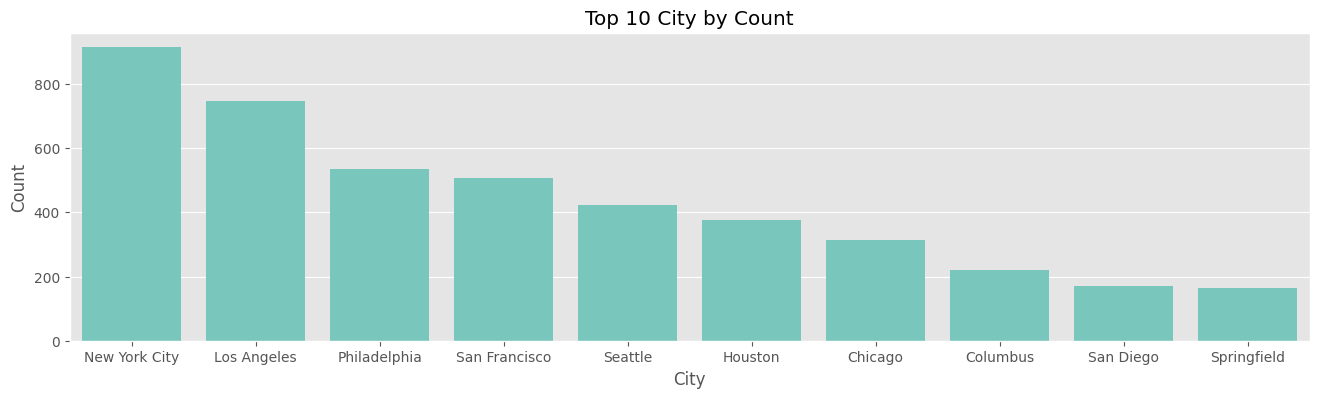

In [ ]:
plt.figure(figsize=(16,4))
c_count = df_store['City'].value_counts().nlargest(10)

ax = sns.barplot(c_count, color='#6cd4c5')
ax.set_ylabel('Count')
ax.set_title('Top 10 City by Count')

plt.show()

#### Category

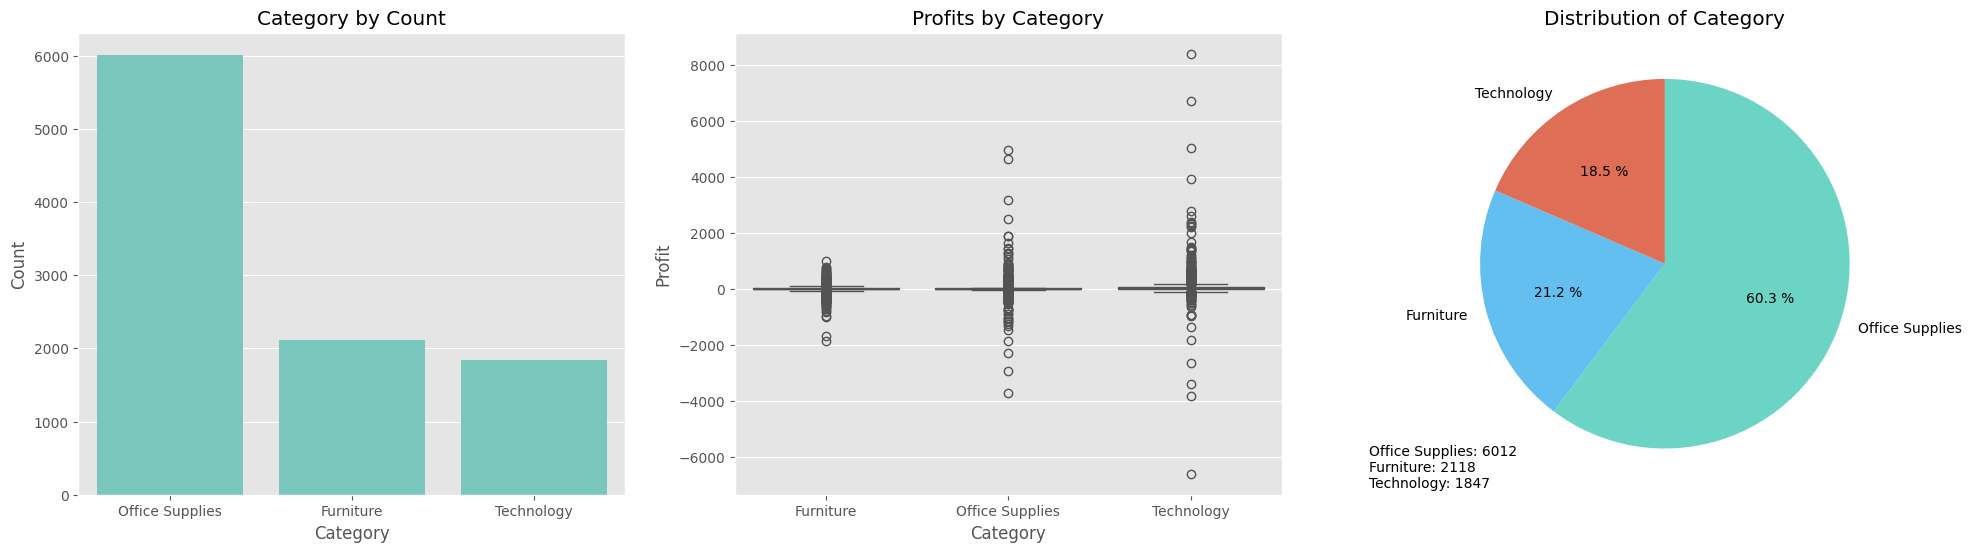

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
cg_count = df_store['Category'].value_counts()

# Barplot
ax1 = sns.barplot(cg_count, ax=ax1,  color='#6cd4c5')
ax1.set_title('Category by Count')
ax1.set_ylabel('Count')
ax1.set_xlabel('Category')

# Boxplot
ax2 = sns.boxplot(y=df_store['Profit'], x=df_store['Category'], ax=ax2)
ax2.set_title('Profits by Category')
ax2.set_xlabel('Category')

# Piechart
cg_colors = ['#6cd4c5', '#63bff0', '#de6e56']
cg_labels = ['Office Supplies', 'Furniture', 'Technology']
plt.pie(cg_count, colors=cg_colors, labels=cg_labels, autopct='%.1f %%', startangle=90, counterclock=False)
plt.title('Distribution of Category')
plt.text(-1.6, -1.3, f'Office Supplies: {cg_count.iloc[0]}\nFurniture: {cg_count.iloc[1]}\nTechnology: {cg_count.iloc[2]}\n', horizontalalignment='left')

plt.show()

#### Sub-Category

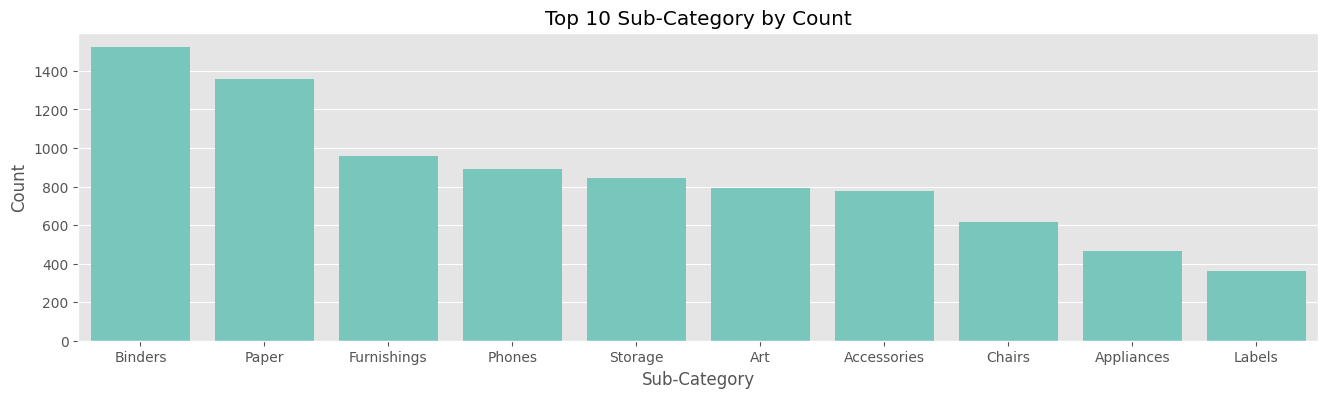

In [ ]:
plt.figure(figsize=(16,4))
scg_count = df_store['Sub-Category'].value_counts().nlargest(10)

ax = sns.barplot(scg_count, color='#6cd4c5')
ax.set_ylabel('Count')
ax.set_title('Top 10 Sub-Category by Count')

plt.show()

### Numerical and Categorical Analysis

#### Profit/Sales/Quantity/Discount with Ship Mode

In [155]:
# Define Plot Function for Barplot + Piechart Combo
def plot(df, column1, column2, c):      # c is the number of records in the dataframe after grouping
    colors = ['#6cd4c5', '#63bff0', '#de6e56', '#ffb400']
    
    df = df.groupby(by=df[f'{column1}'])[f'{column2}'].sum().sort_values(ascending=False)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

    sns.barplot(x=df.index, y=df, hue=df.index, palette=colors[:c], ax=ax1)
    ax1.set_xlabel(f'{column1}')

    plt.pie(df, colors=colors[:c], labels=df.index, startangle=90, counterclock=False, autopct='%.1f %%')
    plt.text(-1.65, -1.2, f'Total {column2}: {round(df.sum(), 2)}', horizontalalignment='left')

    plt.suptitle(f'{column2} by {column1}', fontsize=20)
    plt.show()

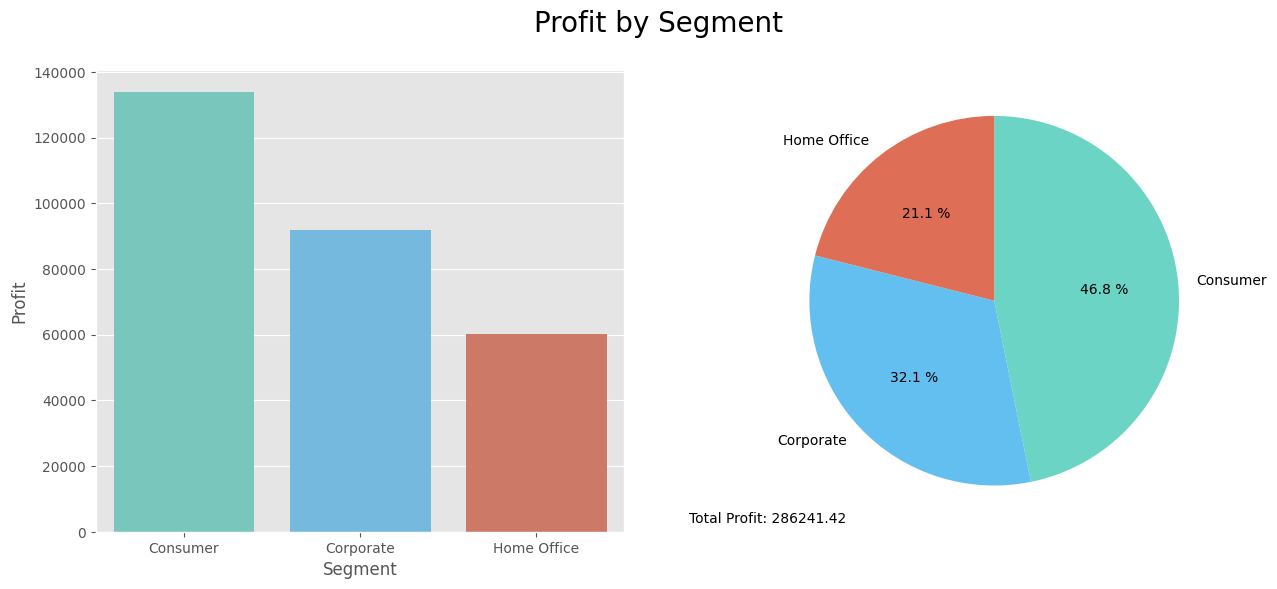

In [156]:
# Profit by Ship Mode
plot(df_store, '', 'Profit', 3)

#### Profit/Sales/Quantity/Discount with Segment